https://www.kaggle.com/datasets/eswarchandt/amazon-music-reviews

    reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
    asin - ID of the product, e.g. 0000013714
    reviewerName - name of the reviewer
    helpful - helpfulness rating of the review, e.g. 2/3
    reviewText - text of the review
    overall - rating of the product
    summary - summary of the review
    unixReviewTime - time of the review (unix time)
    reviewTime - time of the review (raw)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob, Word, Blobber

In [2]:
df = pd.read_csv("C:/Users/support.user2/Desktop/jupyterdata/Musical_instruments_reviews.csv")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


Drop the unnecessary columns to remain with product ID, review and rating

In [3]:
df.drop(['reviewerID','reviewerName','helpful','summary','unixReviewTime','reviewTime'],axis=1,inplace=True)
df.head()

,asin,reviewText,overall
0,1384719342,"Not much to write about here, but it does exac...",5.0
1,1384719342,The product does exactly as it should and is q...,5.0
2,1384719342,The primary job of this device is to block the...,5.0
3,1384719342,Nice windscreen protects my MXL mic and preven...,5.0
4,1384719342,This pop filter is great. It looks and perform...,5.0


In [4]:
len(df)

10261

Check value counts to check number of reviews for each item. The items that have less reviews will offer less analytical value, so we drop them. I picked items that have more than 10 reviews.

In [5]:
df['asin'].value_counts()

B003VWJ2K8    163
B0002E1G5C    143
B0002F7K7Y    116
B003VWKPHC    114
B0002H0A3S     93
             ... 
B004GYM7IE      5
B000LPUV8K      5
B000LAT0AK      5
B004HJ9COU      5
1384719342      5
Name: asin, Length: 900, dtype: int64

In [6]:
df = df[df.groupby("asin")["asin"].transform('size') > 10]

In [7]:
len(df)

6046

Confirm that the reviews column for all the selected items are formatted as text, if not we convert the type to string.
Also, null reviews columns would not be helpfull, they should be removed.

In [8]:
df['reviewText'] = df['reviewText'].astype(str)
df = df[~df["reviewText"].isnull()]

In [9]:
len(df)

6046

The length of the dataframe remained the same showing that there were no null values.

Next is to convert all words to lower case, otherwise the same words could be considered as being different.

In [10]:
df['review1'] = df['reviewText'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['review1'].head()

28    the hosa xlr cables are affordable and very he...
29    i bought these to go from my board to the amp....
30    sturdy cord and plugs, inexpensive, good value...
31    use it every week at gigs. solid, no problems ...
32    hosa products are a good bang for the buck. i ...
Name: review1, dtype: object

Removing punctuation to avoid the same issue.

In [11]:
df['review1'] = df['review1'].str.replace('[^\w\s]', '')
df['review1'].head()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15924\2184321559.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review1'] = df['review1'].str.replace('[^\w\s]', '')


28    the hosa xlr cables are affordable and very he...
29    i bought these to go from my board to the amp ...
30    sturdy cord and plugs inexpensive good value i...
31    use it every week at gigs solid no problems wi...
32    hosa products are a good bang for the buck i h...
Name: review1, dtype: object

Removing stopwords, these are words that don't add much meaning to a sentence.

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['review1'] = df['review1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['review1'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\support.user2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


28    hosa xlr cables affordable heavily madei large...
29    bought go board amp use mobile church take bea...
30    sturdy cord plugs inexpensive good value dont ...
31    use every week gigs solid problems solder join...
32    hosa products good bang buck havent looked spe...
Name: review1, dtype: object

Remove rare words, these are those that appear only once.

In [13]:
freq = pd.Series(' '.join(df['review1']).split()).value_counts()
less_freq = list(freq[freq ==1].index)
less_freq

['sharply',
 'undertightening',
 '9095',
 'acquire',
 'venuecrystal',
 'elongate',
 'recordingno',
 'tuneit',
 'nr300',
 'mutei',
 'blackwithout',
 'impressednot',
 'board34',
 'lengthbottom',
 'requies',
 '20db',
 'canother',
 'clipit',
 'itbehringer',
 'shoulderactually',
 'lightning',
 'strumeverystringatonce',
 'stringbold_strummer',
 'overview',
 'oncheck',
 'fcb10',
 'question34can',
 'schallerstyleon',
 'gerrelltheband',
 'apiece',
 'flops',
 'themselvesi',
 '438hz',
 'okaaaaaay',
 'unitim',
 'attenuate',
 'distortioncreating',
 'playerbuy',
 'okaythe',
 'buckso',
 'mygibson',
 'irritates',
 'tuningworks',
 'heavynoisy',
 'value100',
 'predetermined',
 'minuses',
 '0db',
 'allbehringer',
 'quiescent',
 '440hz',
 'couple4pcs',
 'tunerhowever',
 'bargaintasticif',
 'itstrumming',
 'fs1',
 'cleanhas',
 'indicte',
 'compession',
 'deter',
 'purchasedso',
 'disclaimer',
 'fortyplus',
 '34buckle34',
 'ftu',
 'mariachi',
 'aspectsshould',
 'bolster',
 'specification',
 'interupting',
 

In [14]:
len(less_freq)

11769

From the output, we can see that some of this words are typos and spelling mistakes, we can therefore proceed to remove them

In [15]:
#Spelling correction
#from textblob import TextBlob, Word, Blobber
#df['review1'].apply(lambda x: str(TextBlob(x).correct()))
#df['review1'].head()

In [16]:
df['review1'] = df['review1'].apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))

Stemming which is a technique used in syntactical analysis to lower inflection in words and reduce them to the roots by removing the last few characters.

Lemmatization does the same but unlike stemming considers the context and converts word to its meaningful base form

In [17]:
#lemmatization
import nltk
#nltk.download('omw-1.4')
df['review1'] = df['review1'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['review1'].head()

28    hosa xlr cable affordable heavily large mixer ...
29    bought go board amp use mobile church take bea...
30    sturdy cord plug inexpensive good value dont r...
31    use every week gig solid problem solder joint ...
32    hosa product good bang buck havent looked spec...
Name: review1, dtype: object

In [18]:
##Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['review1'] = df['review1'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [19]:
df

,asin,reviewText,overall,review1
28,B000068NVI,The Hosa XLR cables are affordable and very he...,4.0,hosa xlr cabl afford heavili larg mixer rack c...
29,B000068NVI,I bought these to go from my board to the amp....,5.0,bought go board amp use mobil church take beat...
30,B000068NVI,"Sturdy cord and plugs, inexpensive, good value...",5.0,sturdi cord plug inexpens good valu dont requi...
31,B000068NVI,"Use it every week at gigs. Solid, no problems...",5.0,use everi week gig solid problem solder joint ...
32,B000068NVI,Hosa products are a good bang for the buck. I ...,4.0,hosa product good bang buck havent look specif...
...,...,...,...,...
10256,B00JBIVXGC,"Great, just as expected. Thank to all.",5.0,great expect thank
10257,B00JBIVXGC,I've been thinking about trying the Nanoweb st...,5.0,ive think tri nanoweb string bit put high pric...
10258,B00JBIVXGC,I have tried coated strings in the past ( incl...,4.0,tri coat string past includ elixir never fond ...
10259,B00JBIVXGC,"Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,well made elixir develop taylor guitar string ...


## Data Analysis

I start by adding some features into the dataset;
> review_len - The length of the review

> word_ count - Number of words in the review


In [20]:
df['review_len'] = df['reviewText'].astype(str).apply(len)
df['word_count'] = df['reviewText'].apply(lambda x: len(str(x).split()))

I also add another feature for sentiment analysis
> Polarity - This shows the sentiment of a review. The values are from -1 to 1. -1(Negative aentiment), 0(Neutral), +1(Positive)

In [21]:
df['polarity'] = df['review1'].map(lambda text: TextBlob(text).sentiment.polarity)
df.head()

,asin,reviewText,overall,review1,review_len,word_count,polarity
28,B000068NVI,The Hosa XLR cables are affordable and very he...,4.0,hosa xlr cabl afford heavili larg mixer rack c...,246,39,0.000000
29,B000068NVI,I bought these to go from my board to the amp....,5.0,bought go board amp use mobil church take beat...,131,28,0.433333
30,B000068NVI,"Sturdy cord and plugs, inexpensive, good value...",5.0,sturdi cord plug inexpens good valu dont requi...,156,22,0.700000
31,B000068NVI,"Use it every week at gigs. Solid, no problems...",5.0,use everi week gig solid problem solder joint ...,114,22,0.466667
32,B000068NVI,Hosa products are a good bang for the buck. I ...,4.0,hosa product good bang buck havent look specif...,174,34,0.337500


Visualise distributions in the dataset

array([[<AxesSubplot:title={'center':'review_len'}>,
        <AxesSubplot:title={'center':'word_count'}>],
       [<AxesSubplot:title={'center':'polarity'}>, <AxesSubplot:>]],
      dtype=object)

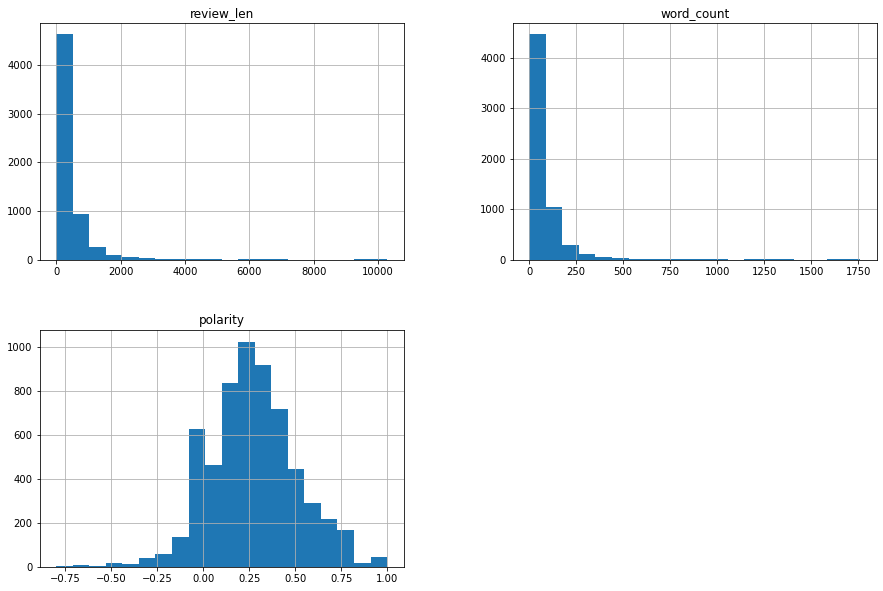

In [22]:
df[["review_len", "word_count", "polarity"]].hist(bins=20, figsize=(15, 10))

The review length and word counts are obviously similarly distributed with a majority of them being in the lower range.

The polarity is normally distributed with a majority of the reviews being > 0, that is having positive sentiment

Using a box plot, we can also visualise how polarity relates to rating

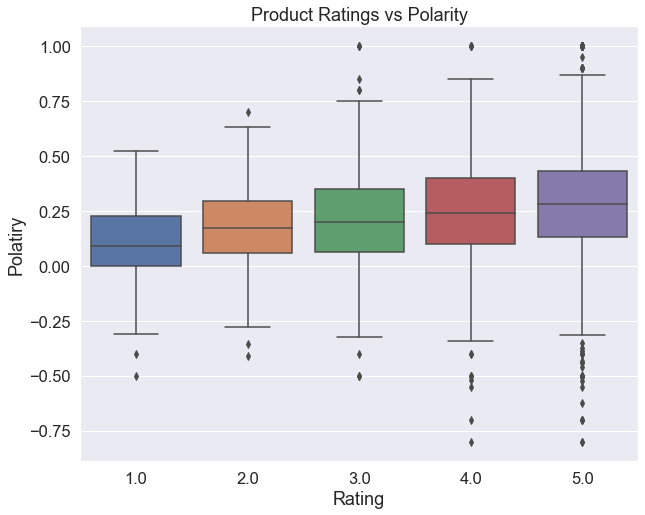

In [23]:
plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.boxplot(x = 'overall', y = 'polarity', data = df)
plt.xlabel("Rating")
plt.ylabel("Polatiry")
plt.title("Product Ratings vs Polarity")
plt.show()

The mean polarity keeps going higher with the rating.

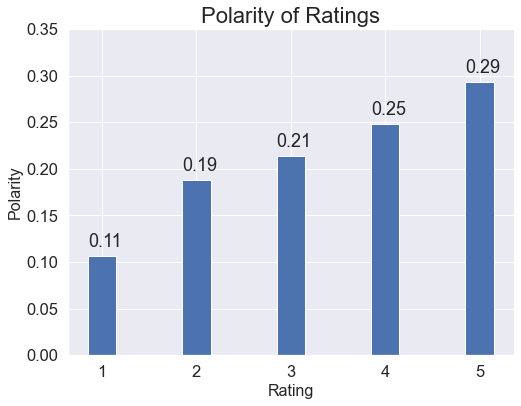

In [24]:
mean_pol = df.groupby('overall')['polarity'].agg([np.mean])
mean_pol.columns = ['mean_polarity']
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(mean_pol.index, mean_pol.mean_polarity, width=0.3)
#plt.gca().set_xticklabels(mean_pol.index, fontdict={'size': 14})
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+0.01, str("{:.2f}".format(i.get_height())))
plt.title("Polarity of Ratings", fontsize=22)
plt.ylabel("Polarity", fontsize=16)
plt.xlabel("Rating", fontsize=16)
plt.ylim(0, 0.35)
plt.show()

The same can be viewed when we check the polarity of ratings.

This could mean that the reviews did not have that many negative words in it as all are above 0

Visualising the count plot for the reviews outputs the below.

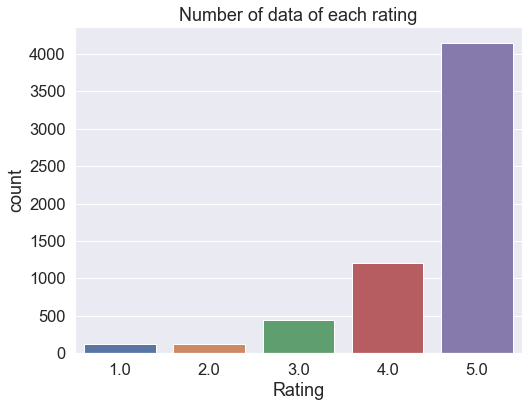

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='overall', data=df)
plt.xlabel("Rating")
plt.title("Number of data of each rating")
plt.show()

Most of the reviews have a rating of 5.
This shows a majority of the customers were satisfied.

We can also review how product rating relates to review length using a pointplot

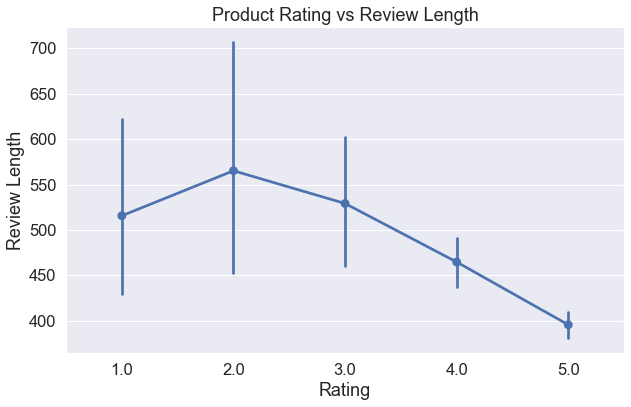

In [26]:
plt.figure(figsize=(10, 6))
sns.pointplot(x = "overall", y = "review_len", data = df)
plt.xlabel("Rating")
plt.ylabel("Review Length")
plt.title("Product Rating vs Review Length")
plt.show()

We can see that a the review length is low for ratings 5 and 4.

This means that satisfied customers don't talk too much, those that wrote more gave a rating of 2, which could mean they were not satisfied with the product but felt that if their comments were acted on, this could be corrected.

# Top 20 and bottom 20 products based on polarity

In [27]:
product_pol = df.groupby('asin')['polarity'].agg([np.mean])
product_pol.columns = ['polarity']
product_pol = product_pol.sort_values('polarity', ascending=False)
product_pol = product_pol.head(20)
product_pol

,polarity
asin,
B0002GIRP2,0.469615
B003NJF1G8,0.449145
B0002M6CVC,0.419348
B0009DXEEM,0.417629
B0002KZAKS,0.417027
B0018TG8HQ,0.412750
B000EEL6J6,0.412197
B0002PBS6I,0.403295
B0055V7UR0,0.402947


In [28]:
product_pol = df.groupby('asin')['polarity'].agg([np.mean])
product_pol.columns = ['polarity']
product_pol = product_pol.sort_values('polarity', ascending=False)
product_pol2 = product_pol.tail(20)
product_pol2

,polarity
asin,
B0002DV7ZM,0.168214
B000CD1R84,0.167623
B000WN4J9S,0.167604
B0002GZBLU,0.165932
B0002KZIVY,0.165492
B0002IAJ56,0.165342
B001MMYVZU,0.152239
B005FKF1PY,0.147483
B0006ZXFWO,0.142306


## Wordcloud

Start by combining all the texts in the reviews to form a text corpus

In [29]:
text = " ".join(review for review in df.review1)

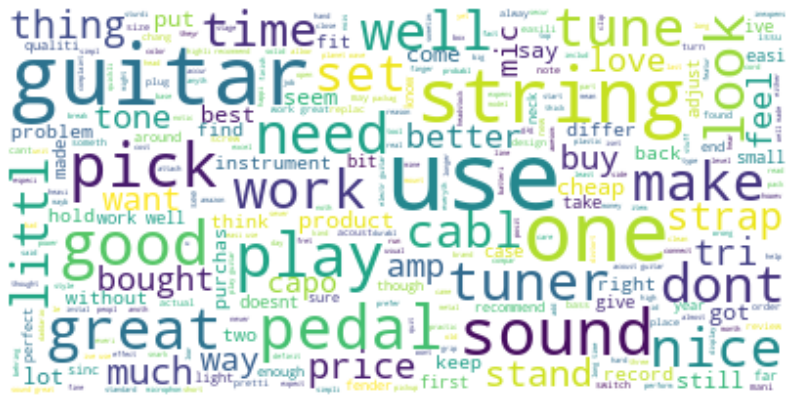

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl"])
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

From this words like guitar and string appear more frequently.

This could mean that the guitar is the most common instrument bought and reviewed.

In [38]:
## Frequency charts

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['review1'], 20)
df1 = pd.DataFrame(common_words, columns = ['ReviewText', 'count'])
df1.head()

,ReviewText,count
0,guitar,4129
1,use,3916
2,string,3069
3,one,2700
4,great,2203


<AxesSubplot:title={'center':'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

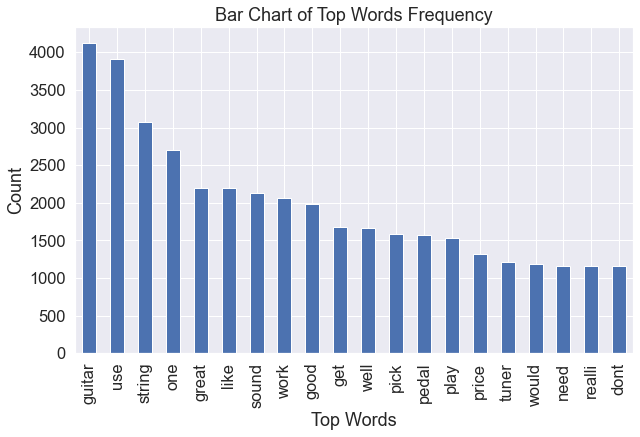

In [32]:
df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

This confirms that guitars are more frequent in our data set.

Co-occuring words could provide more meaning to frequently occuring items so I proceeded to check for bi-grams and tri grams

In [33]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(df['review1'], 30)
df2 = pd.DataFrame(common_words2, columns=['Review', "Count"])
df2.head()

,Review,Count
0,work well,387
1,work great,302
2,acoust guitar,240
3,ive use,239
4,highli recommend,217


<AxesSubplot:title={'center':'Bar chart of Bigrams Frequency'}, xlabel='Bigram Words', ylabel='Count'>

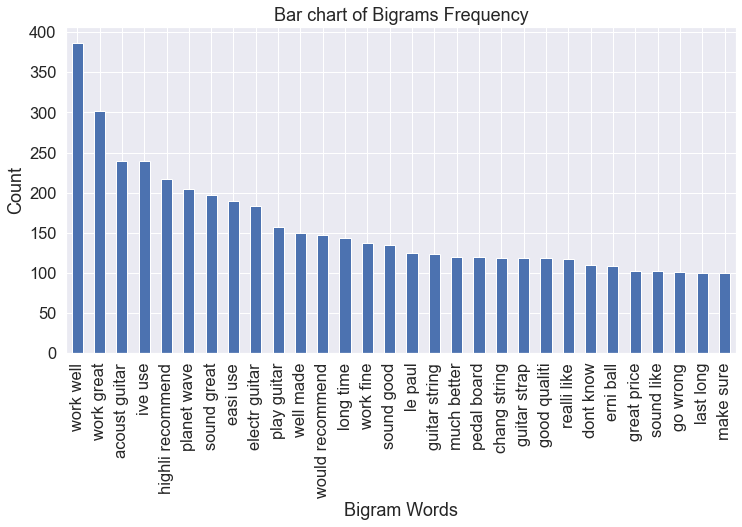

In [34]:
df2.groupby('Review').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)

<AxesSubplot:title={'center':'Bar chart of Trigrams Frequency'}, xlabel='Trigram Words', ylabel='Count'>

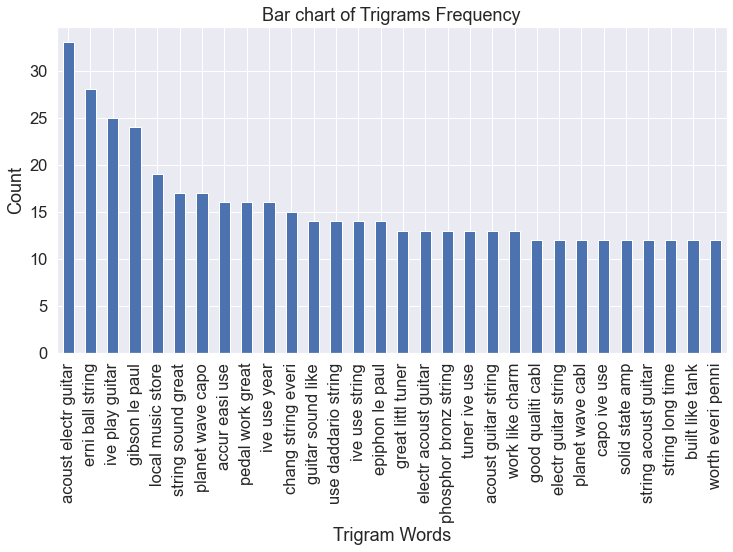

In [35]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words3 = get_top_n_trigram(df['review1'], 30)
df3 = pd.DataFrame(common_words3, columns = ['Review' , 'Count'])
df3.groupby('Review').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Trigram Words",
    ylabel = "Count",
    title = "Bar chart of Trigrams Frequency"
)

The words with the most frequency appear to be from guitars, the main one being the acoustic guitar and positive reviews which we had visualised earlier.

This could mean that majority of customers are satisfied with the acoustic guitar and the company should ensure that it is always in stock to maximise potential for profit.

## Potential uses

Target marketing: The analytics could be used to identify areas where more marketing is needed and areas where the companies could ease up on.

Customer service teams: Service teams can automate much of their mundane tasks like researching, updating, routing and reduce time spent on repetitive questions.